In [2]:
from google.colab import drive
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muahammadrionandod","key":"d0c9f1dfec82f6af90fcc9cc62f00bc5"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [6]:
!kaggle datasets download -d mahirkukreja/delhi-weather-data

  0% 0.00/1.00M [00:00<?, ?B/s]
100% 1.00M/1.00M [00:00<00:00, 68.8MB/s]


In [7]:
from zipfile import ZipFile
file_name = "delhi-weather-data.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [8]:
df = pd.read_csv('testset.csv')
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [9]:
df.shape

(100990, 20)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [11]:
df.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [12]:
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [13]:
df.drop([' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'], axis=1, inplace=True)

In [14]:
display(df)

,datetime_utc,_tempm
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0
...,...,...
100985,20170424-06:00,34.0
100986,20170424-09:00,38.0
100987,20170424-12:00,36.0
100988,20170424-15:00,32.0


In [15]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])  
get_data = (df['datetime_utc'] > '2010-01-01') & (df['datetime_utc'] <= '2015-01-01')
df.loc[get_data]

df = df.loc[get_data]
display(df)

,datetime_utc,_tempm
76656,2010-01-01 03:00:00,9.0
76657,2010-01-01 06:00:00,18.0
76658,2010-01-01 09:00:00,21.0
76659,2010-01-01 12:00:00,19.0
76660,2010-01-01 15:00:00,13.0
...,...,...
89996,2014-12-31 12:00:00,16.0
89997,2014-12-31 15:00:00,11.0
89998,2014-12-31 18:00:00,10.0
89999,2014-12-31 21:00:00,9.0


In [16]:
df.isnull().sum()

datetime_utc     0
 _tempm         46
dtype: int64

In [17]:
df.dropna(subset=['datetime_utc'],inplace=True)
df.dropna(subset=[' _tempm'],inplace=True)
df.isnull().sum()

datetime_utc    0
 _tempm         0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13299 entries, 76656 to 90000
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime_utc  13299 non-null  datetime64[ns]
 1    _tempm       13299 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 311.7 KB


In [19]:
dates = df['datetime_utc'].values
tempm = df[' _tempm'].values

Text(0.5, 0, 'Datetime')

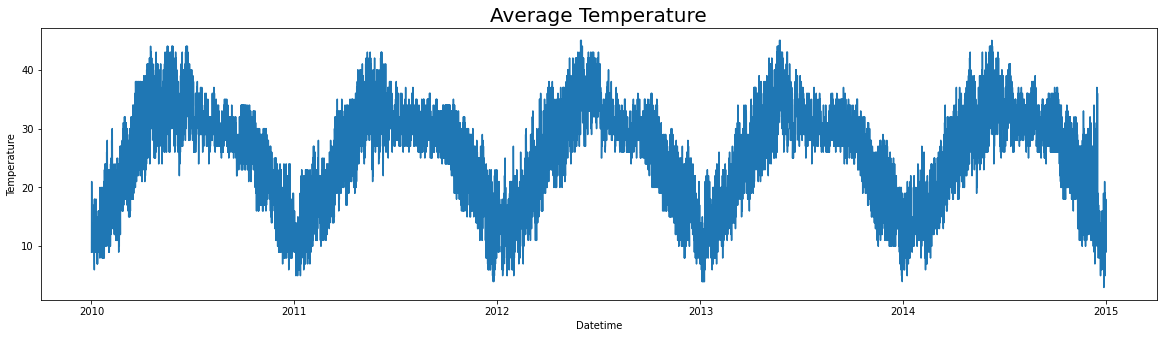

In [20]:
dates = np.array(dates)
temp = np.array(tempm)
plt.figure(figsize=(20,5))
plt.plot(dates, tempm)
plt.title('Average Temperature', fontsize = 20)
plt.ylabel('Temperature')
plt.xlabel('Datetime')

In [21]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(tempm, dates, train_size=0.8, test_size = 0.2, shuffle = False )
print(len(x_train), len(x_valid))

10639 2660


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Dropout

In [24]:
tf.keras.backend.set_floatx('float64')

train_set = windowed_dataset(x_train, window_size=64, batch_size=200, shuffle_buffer=1000)
val_set = windowed_dataset(x_valid, window_size=64, batch_size=200, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
    Bidirectional(LSTM(60, return_sequences=True)),
    Bidirectional(LSTM(60)),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1),
])

In [25]:
Mae = (df[' _tempm'].max() - df[' _tempm'].min()) * 10/100
print(Mae)

4.2


In [26]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<4.2 and logs.get('val_mae')<4.2):
      print("\nMAE dari model < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [27]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(train_set, epochs=100, validation_data = val_set, callbacks=[callbacks])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


      6/Unknown - 13s 93ms/step - loss: 27.4685 - mae: 27.9685WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0403s vs `on_train_batch_end` time: 0.0463s). Check your callbacks.
53/53 [==============================] - 19s 127ms/step - loss: 24.1349 - mae: 24.6349 - val_loss: 25.4062 - val_mae: 25.9062
Epoch 2/100
53/53 [==============================] - 5s 86ms/step - loss: 22.9920 - mae: 23.4920 - val_loss: 24.2274 - val_mae: 24.7274
Epoch 3/100
53/53 [==============================] - 5s 84ms/step - loss: 21.4653 - mae: 21.9653 - val_loss: 22.0608 - val_mae: 22.5608
Epoch 4/100
53/53 [==============================] - 5s 86ms/step - loss: 17.9550 - mae: 18.4531 - val_loss: 16.3765 - val_mae: 16.8741
Epoch 5/100
53/53 [==============================] - 5s 90ms/step - loss: 10.3155 - mae: 10.8077 - val_loss: 6.4648 - val_mae: 6.9561
Epoch 6/100
53/53 [==============================] - 5s 86ms/step - loss: 5.9466 - mae: 6.4292 -

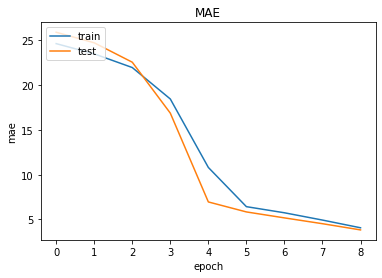

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

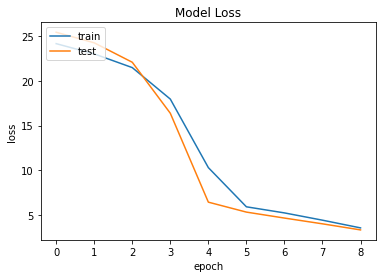

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()